# Introduction
In this kernel, we are going to predict whether a credit card is fraud or not using Machine Learning.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Due to confidentiality issues, the input variables are transformed into numerical using PCA transformations.

The dataset is taken from kaggle here.

# Importing the required Python libraries.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

# Data Preprocessing
Let's get the dataset into a pandas dataframe.

In [85]:
data = pd.read_csv('creditcard.csv')
df = data.copy() # To keep the data as backup
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [86]:
df.shape

(284807, 31)

In [87]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [88]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [89]:
df.Time.tail(15)

284792    172774.0
284793    172775.0
284794    172777.0
284795    172778.0
284796    172780.0
284797    172782.0
284798    172782.0
284799    172783.0
284800    172784.0
284801    172785.0
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, dtype: float64

In [90]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Checking the frequency of frauds before moving forward

In [91]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

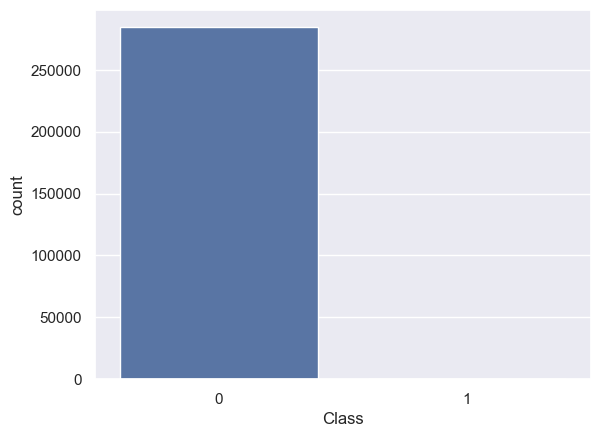

In [92]:
sns.countplot(x=df.Class)

# Checking the distribution of amount

<Axes: xlabel='Amount', ylabel='Density'>

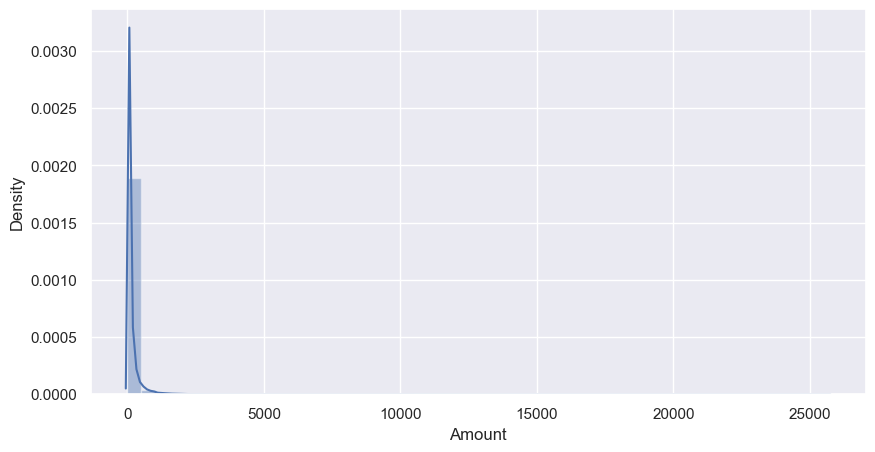

In [93]:
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

Since, it is a little difficult to see. Let's engineer a new feature of bins.

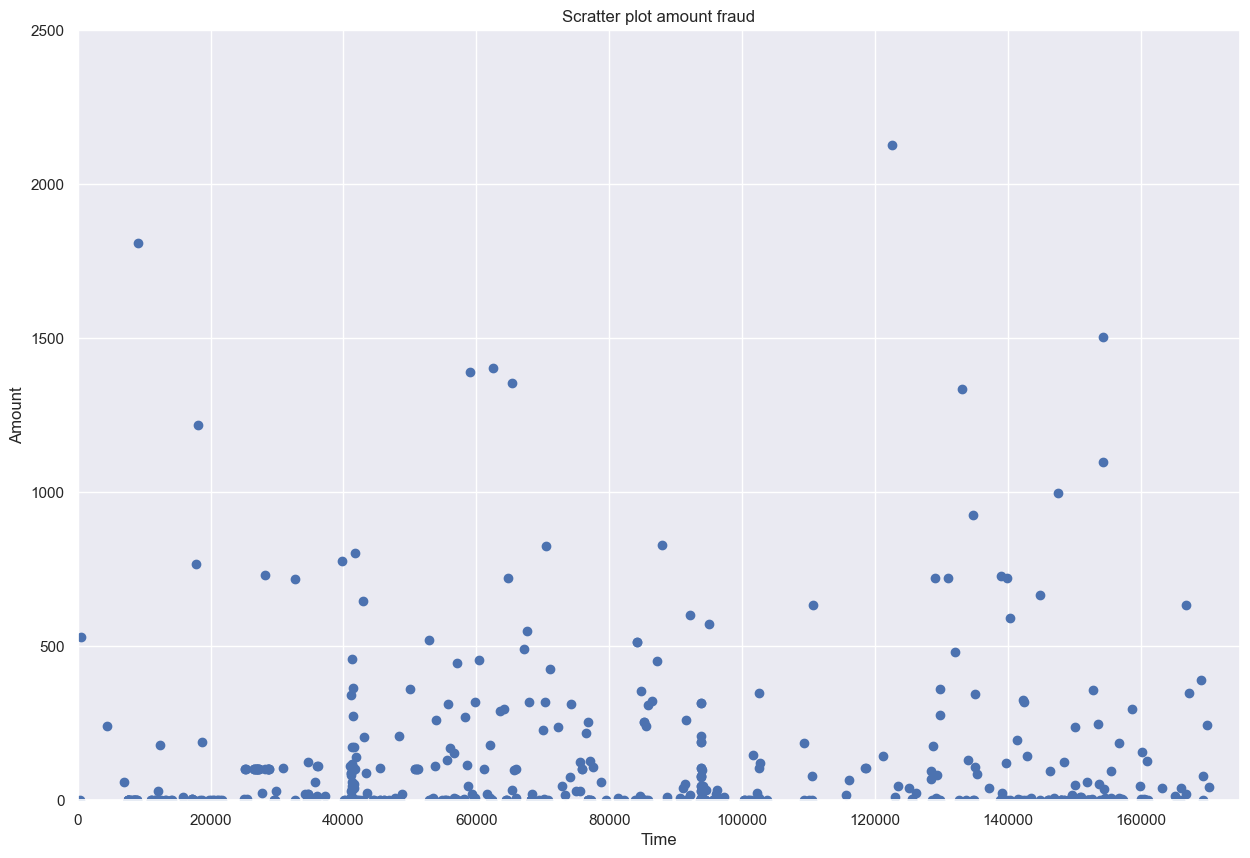

In [94]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [95]:
df['Amount-Bins'] = ''

Now Let's set the bins and their labels.

In [96]:
def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bin_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    
    return bins, bin_labels

In [97]:
bins, bin_labels = make_bins(df.Amount, size=10)

In [98]:
df['Amount-Bins'] = pd.cut(df.Amount, bins=bins,
                           labels=bin_labels, include_lowest=True)
df['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0 to 2854
1,0 to 2854
2,0 to 2854
3,0 to 2854
4,0 to 2854


In [99]:
df['Amount-Bins'].value_counts()

Amount-Bins
0 to 2854         284484
2854 to 5709         285
5709 to 8563          28
8563 to 11418          4
11418 to 14272         3
17127 to 19982         2
22836 to 25691         1
14272 to 17127         0
19982 to 22836         0
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

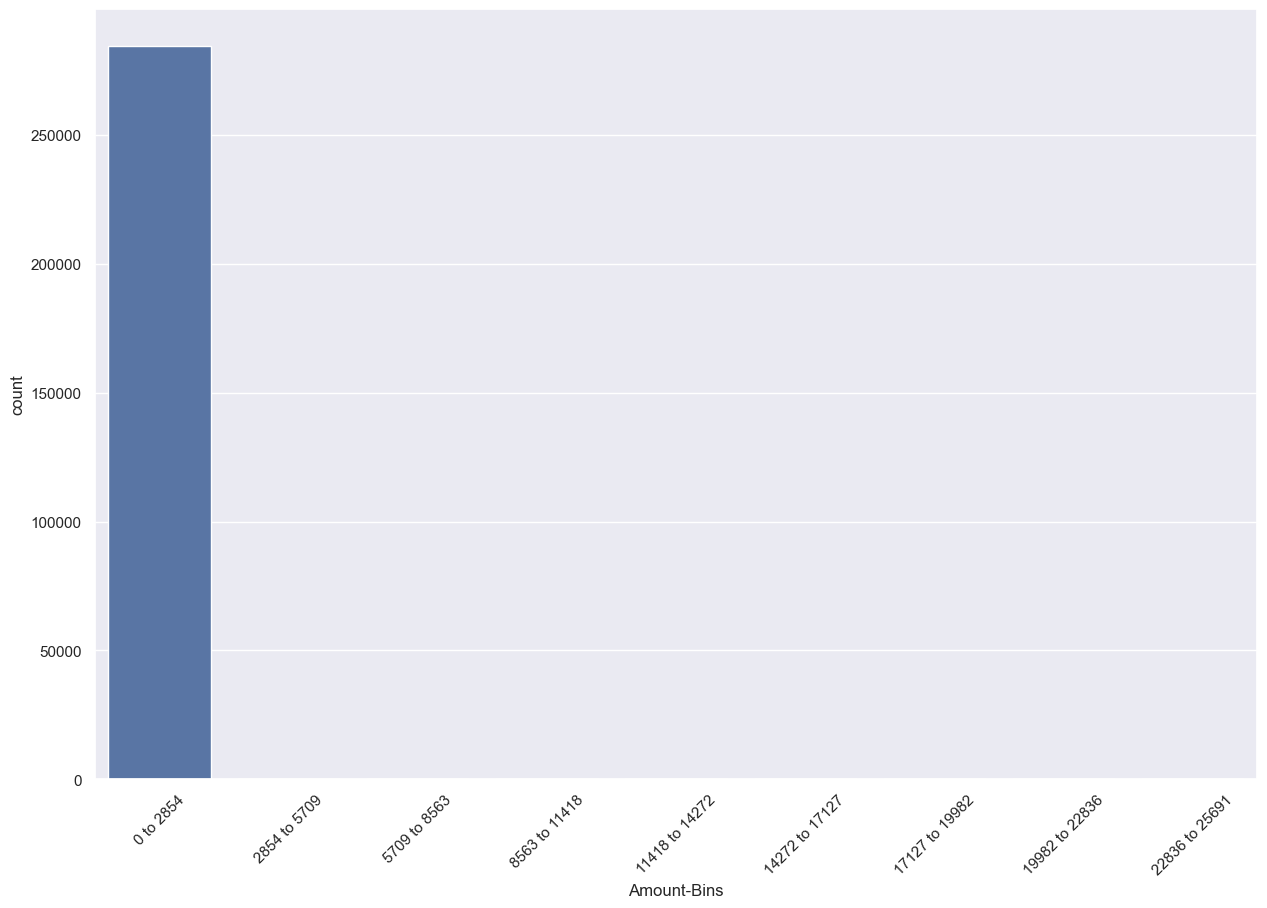

In [100]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df)
plt.xticks(rotation=45)

Since, count of values of Bins other than '0 to 2854' are difficult to view. Let's not insert the first one.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

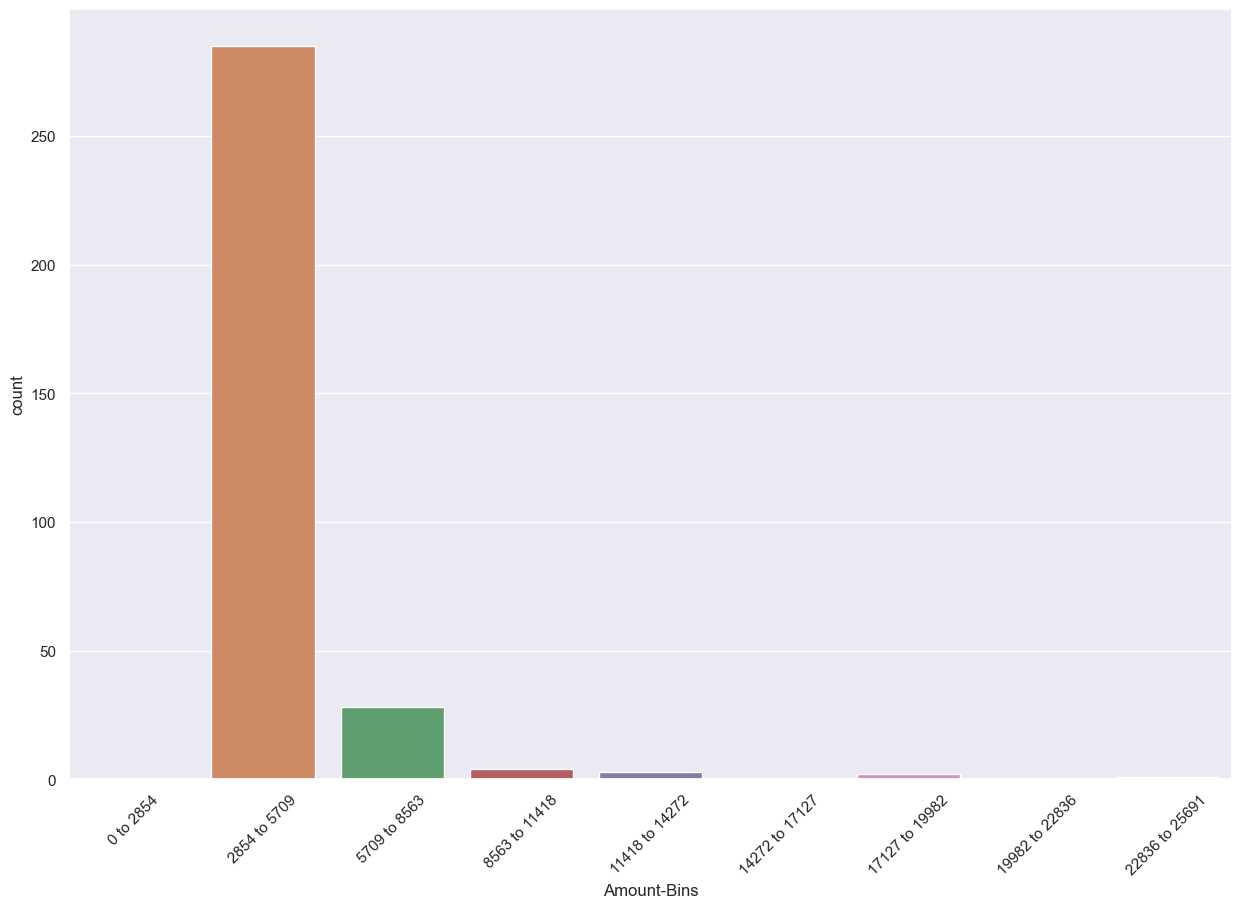

In [101]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df[~(df['Amount-Bins'] == '0 to 2854')])
plt.xticks(rotation=45)

# Predictive Modelling
Let's predict whether a credit card is fraud or not using machine learning.values.

# One-hot encoding the Amount-Bins
Since, for classification, we need to pass the data in numerical form. That's why we need to One-Hot encode the Amount-Bins column.
Note: We can also label encode values.

In [102]:
df_encoded = pd.get_dummies(data=df, columns=['Amount-Bins'])
df = df_encoded.copy()

In [103]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,True,False,False,False,False,False,False,False,False
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,True,False,False,False,False,False,False,False,False
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,True,False,False,False,False,False,False,False,False
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,True,False,False,False,False,False,False,False,False
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,True,False,False,False,False,False,False,False,False


# Breaking the dataset into training and testing
First, separating the response variable from the explanatory variables.

In [104]:
X = df.drop(labels='Class', axis=1)
Y = df['Class']

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


# Applying Machine Learning Algorithms
Let's apply different Machine Learning Algorithms then compare their metrics to select the most suitable ML algorithm.



Logistic Regression















Random Forest

#### The metrics we'll use initially are:
1. Accuracy
2. Precision
3. F1-Score

# Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [108]:
# Training the algorithm
lr_model.fit(xtrain, ytrain)

LogisticRegression()

In [109]:
# Predictions on training and testing data
lr_pred_train = lr_model.predict(xtrain)
lr_pred_test = lr_model.predict(xtest)

In [110]:
# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [111]:
tn, fp, fn, tp = confusion_matrix(ytest, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,75,61
Not Fraud,20,85287


<Axes: >

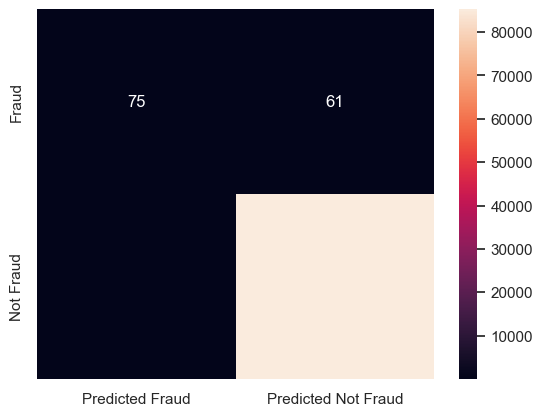

In [112]:
sns.heatmap(conf_matrix, annot=True)

In [113]:
lr_accuracy = accuracy_score(ytest, lr_pred_test)
lr_accuracy

0.9990519995786665

In [114]:
lr_precision = precision_score(ytest, lr_pred_test)
lr_precision

0.7894736842105263

In [115]:
lr_recall = recall_score(ytest, lr_pred_test)
lr_recall

0.5514705882352942

In [116]:
lr_recall_train = recall_score(ytrain, lr_pred_train)
lr_recall_train

0.6264044943820225

In [117]:
from sklearn.metrics import f1_score

In [118]:
lr_f1 = f1_score(ytest, lr_pred_test)
lr_f1

0.6493506493506493

In [119]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(ytest, lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.79      0.55      0.65       136

    accuracy                           1.00     85443
   macro avg       0.89      0.78      0.82     85443
weighted avg       1.00      1.00      1.00     85443



In [121]:
lr_pred_test_prob = lr_model.predict_proba(xtest)[:, 1]

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score

In [123]:
fpr, tpr, threshold = roc_curve(ytest, lr_pred_test_prob)

In [124]:
lr_auc = roc_auc_score(ytest, lr_pred_test_prob)
lr_auc

0.8844150435210131

In [125]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

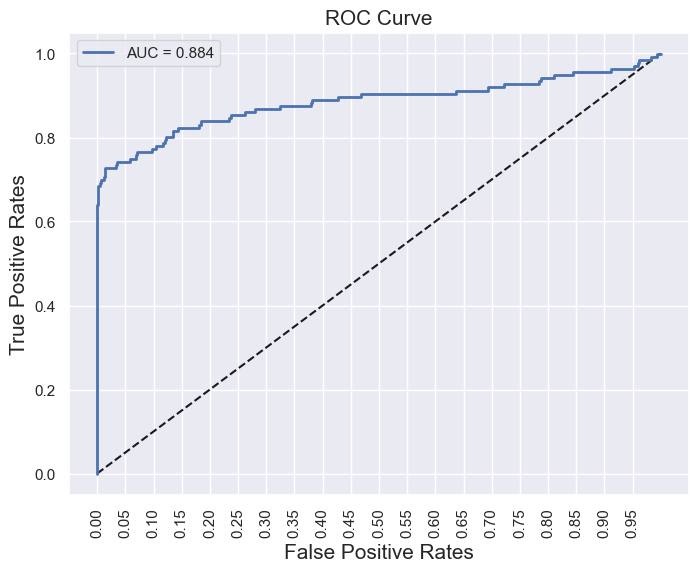

In [126]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

# Model Complexity
Let's try to train the Logistic Regression models on the 2nd degree of polynomials. Not going further 2nd degree because features are already too much. Otherwise, computer gives the MemoryError.

In [127]:
from sklearn.preprocessing import PolynomialFeatures

In [128]:
# Getting the polynomial features
poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.fit_transform(xtest)

# Training the model
model = LogisticRegression()
model.fit(xtrain_poly, ytrain)

# Getting the probabilities
train_prob = model.predict_proba(xtrain_poly)[:, 1]
test_prob = model.predict_proba(xtest_poly)[:, 1]

# Computing the ROC Score
roc_auc_score(ytrain, train_prob), roc_auc_score(ytest, test_prob)

(0.9122902334342383, 0.9238497340746467)

In [129]:
fpr_poly, tpr_poly, threshold_poly = roc_curve(ytest, test_prob)

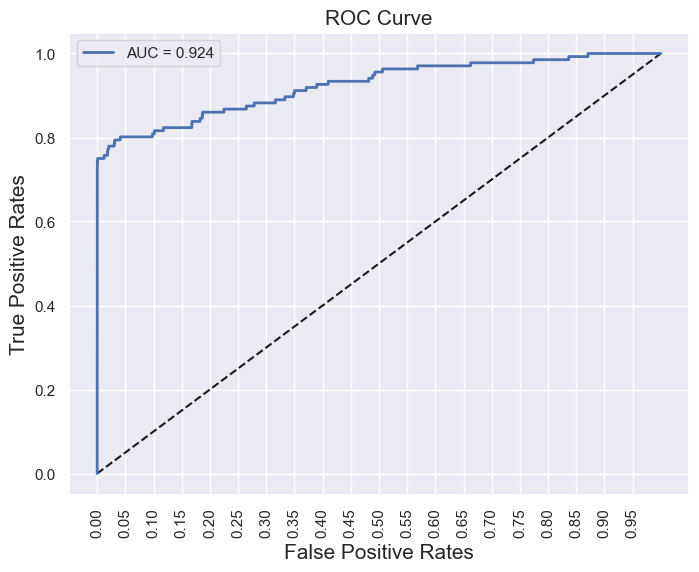

In [130]:
plot_roc_curve(fpr=fpr_poly, tpr=tpr_poly, label='AUC = %.3f' %  roc_auc_score(ytest, test_prob))

In [131]:
recall_score(ytest, model.predict(xtest_poly))

0.75

# Randome Forest Regression - ML Model Training¶

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
regressor = RandomForestRegressor(n_estimators=5, criterion='friedman_mse')
regressor.fit(xtrain, ytrain)

RandomForestRegressor(criterion='friedman_mse', n_estimators=5)

In [134]:
regressor.score(xtest, ytest)

0.7139564679541505

In [135]:
# regressor_100 = RandomForestRegressor(n_estimators=10, criterion='absolute_error')
# regressor_100.fit(xtrain, ytrain)

# Randome Forest Classifier - ML Model Training¶

In [136]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion= 'entropy', random_state= 0)
classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [137]:
classifier.score(xtest,ytest)

0.9996254813150287

## Problems:
Imbalanced Data: Fraudulent transactions are rare compared to legitimate ones, leading to highly imbalanced datasets. This imbalance can cause models to be biased towards predicting non-fraudulent transactions, as they dominate the dataset.

Dynamic and Evolving Patterns: Fraudsters continually adapt their strategies to evade detection. This requires models to be regularly updated and retrained to capture new patterns of fraud.

Feature Engineering: Identifying and creating relevant features that effectively distinguish between fraudulent and legitimate transactions is complex. It often involves domain expertise and continuous iteration.

Data Privacy and Security: Handling sensitive financial data necessitates stringent privacy and security measures. Ensuring data is anonymized and securely stored and processed is crucial.

Real-time Processing: Fraud detection systems often need to operate in real-time to prevent losses. This requires efficient algorithms and infrastructure to process large volumes of transactions quickly.

False Positives and Negatives: Striking a balance between false positives (legitimate transactions flagged as fraud) and false negatives (fraudulent transactions not detected) is challenging. Both types of errors have significant consequences: false positives can inconvenience customers, while false negatives can lead to financial losses.

Interpretability: Many advanced machine learning models, such as deep learning, can be difficult to interpret. In the financial sector, it’s important to understand and explain why a transaction was flagged as fraudulent, which can be challenging with complex models.

Data Quality and Availability: High-quality, comprehensive datasets are essential for training effective models. Issues like missing data, noise, and lack of labeled data can hinder model performance.

Scalability: Fraud detection systems need to scale efficiently to handle the large and growing volume of transactions without compromising performance or accuracy.

Addressing these challenges requires a combination of advanced machine learning techniques, domain expertise, robust data management practices, and ongoing adaptation to emerging fraud patterns.


# Conclusion
In summary, credit card fraud detection in machine learning is a complex task due to the rarity of fraudulent transactions, evolving fraud techniques, and the need for real-time processing. Successfully tackling this issue requires robust feature engineering, strict data privacy, and a balance between reducing false positives and negatives. Ensuring the interpretability and scalability of models while maintaining high data quality is also crucial. Addressing these challenges involves continuous learning, adaptation, and the integration of advanced machine learning methods with domain expertise to effectively combat fraud.






